<a href="https://colab.research.google.com/github/saadz-khan/Text2Image/blob/master/pixray_diffusion_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# init

In [1]:
!rm -rf pixray
!git clone -b vdiffcomplete https://github.com/DazhiZhong/pixray-1 pixray
!rm -rf v-diffusion-pytorch
!git clone --recursive https://github.com/DazhiZhong/v-diffusion-pytorch

Cloning into 'pixray'...
remote: Enumerating objects: 942, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 942 (delta 88), reused 107 (delta 55), pack-reused 793
Receiving objects: 100% (942/942), 382.14 KiB | 3.41 MiB/s, done.
Resolving deltas: 100% (596/596), done.
Cloning into 'v-diffusion-pytorch'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 135 (delta 71), reused 80 (delta 45), pack-reused 26
Receiving objects: 100% (135/135), 12.58 MiB | 5.76 MiB/s, done.
Resolving deltas: 100% (76/76), done.
Submodule 'CLIP' (https://github.com/openai/CLIP) registered for path 'CLIP'
Cloning into '/content/v-diffusion-pytorch/CLIP'...
remote: Enumerating objects: 185, done.        
remote: Counting objects: 100% (17/17), done.        
remote: Compressing objects: 100% (11/11), done.        
remote: Total 185 (delta 7), r

In [2]:
!pip install -r v-diffusion-pytorch/requirements.txt

     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=141c46a7247fecb9a8cdfafd87070bc4cbc46f33e87e5a78be25ac0c50d10cf0
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [3]:
!pip install -r pixray/requirements.txt
!pip uninstall -y tensorflow 
!git clone https://github.com/pixray/diffvg
%cd diffvg
!git submodule update --init --recursive
!python setup.py install
%cd ..
!pip freeze | grep torch

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Cloning https://github.com/bfirsh/taming-transformers.git (to revision 7a6e64ee) to /tmp/pip-req-build-75jtxbg3
  Running command git clone -q https://github.com/bfirsh/taming-transformers.git /tmp/pip-req-build-75jtxbg3
  Running command git checkout -q 7a6e64ee
  Cloning https://github.com/openai/CLIP (to revision 573315e) to /tmp/pip-req-build-lty2w5n7
  Running command git clone -q https://github.com/openai/CLIP /tmp/pip-req-build-lty2w5n7
  Running command git checkout -q 573315e
  Cloning https://github.com/pvigier/perlin-numpy (to revision 6f077f8) to /tmp/pip-req-build-1_wh85mt
  Running command git clone -q https://github.com/pvigier/perlin-numpy /tmp/pip-req-build-1_wh85mt
  Running command git checkout -q 6f077f8
  Cloning https://github.com/fbcotter/pytorch_wavelets to /tmp/pip-req-build-wnp8_1nt
  Running command git clone -q https://github.com/fbcotter/pytorch_wavelets /tmp/pip-req-build-wnp8_1nt
  Clo

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
Cloning into 'diffvg'...
remote: Enumerating objects: 283, done.
remote: Total 283 (delta 0), reused 0 (delta 0), pack-reused 283
Receiving objects: 100% (283/283), 10.27 MiB | 13.57 MiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/diffvg
Submodule 'pybind11' (https://github.com/pybind/pybind11.git) registered for path 'pybind11'
Submodule 'thrust' (https://github.com/thrust/thrust.git) registered for path 'thrust'
Cloning into '/content/diffvg/pybind11'...
Cloning into '/content/diffvg/thrust'...
Submodule path 'pybind11': checked out '72b06b86b3824781f31c790dfce67e26e6307816'
Submodule 'tools/clang' (https://github.com/wjakob/clang-cindex-python3.git) registered for path 'pybind11/tools/clang'
Cloning into '/content/diffvg/pybind11/tools/clang'...
Submodule path 'pybind11/tools/clang': checked out '6a00cbc4a9b8e68b71caf7f774b3f9c753ae84d5'
Submodule pa

In [4]:
import os
os.makedirs("v-diffusion-pytorch/checkpoints", exist_ok=True)
os.makedirs("pixray/checkpoints", exist_ok=True)
os.makedirs("models", exist_ok=True)

In [5]:
!wget --output-document models/yfcc_2.pth https://v-diffusion.s3.us-west-2.amazonaws.com/yfcc_2.pth --continue
!cp models/yfcc_2.pth pixray/checkpoints/yfcc_2.pth 
!cp models/yfcc_2.pth v-diffusion-pytorch/checkpoints/yfcc_2.pth

--2022-01-22 09:28:05--  https://v-diffusion.s3.us-west-2.amazonaws.com/yfcc_2.pth
Resolving v-diffusion.s3.us-west-2.amazonaws.com (v-diffusion.s3.us-west-2.amazonaws.com)... 52.218.178.73
Connecting to v-diffusion.s3.us-west-2.amazonaws.com (v-diffusion.s3.us-west-2.amazonaws.com)|52.218.178.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3873078669 (3.6G) [application/octet-stream]
Saving to: ‘models/yfcc_2.pth’

models/yfcc_2.pth   100%[===================>]   3.61G  22.2MB/s    in 2m 48s  

2022-01-22 09:30:54 (22.0 MB/s) - ‘models/yfcc_2.pth’ saved [3873078669/3873078669]



# main

Using seed: 10175923663368938108
reusing cached copy of model  models/vqgan_imagenet_f16_16384.ckpt
All CLIP models already loaded:  ['RN50x4', 'RN101', 'ViT-B/32', 'ViT-B/16']
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['the angel of air unreal engine', 'trending on artstation']


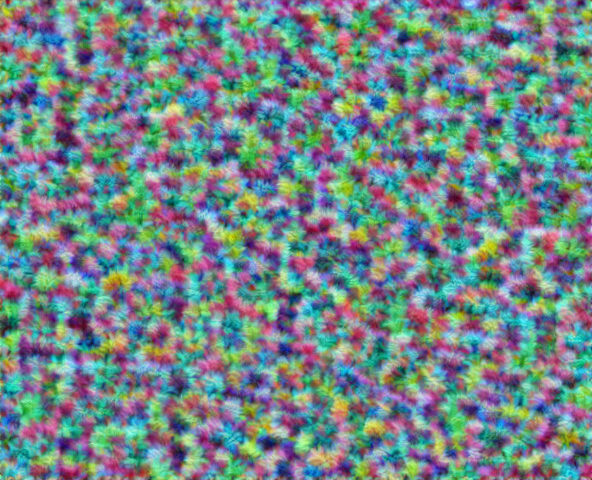

iter: 0, loss: 7.03, losses: 0.794, 0.799, 0.0706, 0.713, 0.708, 0.0834, 0.933, 0.935, 0.0468, 0.962, 0.936, 0.0492 (-0=>7.03)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


iter: 10, loss: 6.81, losses: 0.751, 0.787, 0.0737, 0.694, 0.699, 0.0873, 0.907, 0.91, 0.0446, 0.905, 0.907, 0.0457 (-1=>6.785)


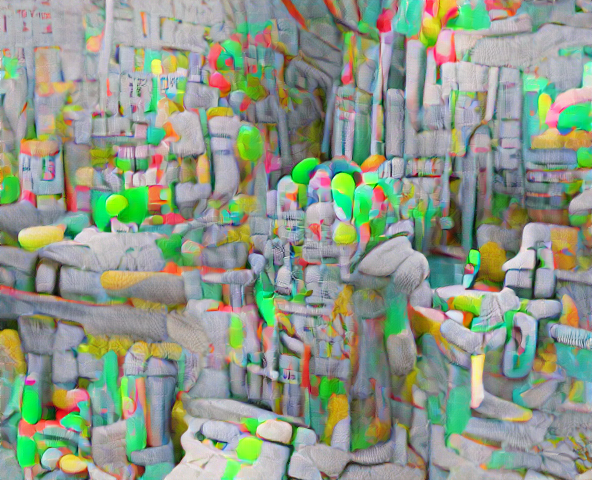

iter: 20, loss: 6.61, losses: 0.715, 0.755, 0.0755, 0.669, 0.685, 0.0873, 0.884, 0.893, 0.0432, 0.869, 0.889, 0.0442 (-0=>6.611)
iter: 30, loss: 6.47, losses: 0.713, 0.736, 0.076, 0.64, 0.666, 0.0879, 0.872, 0.879, 0.0434, 0.83, 0.88, 0.0452 (-0=>6.468)


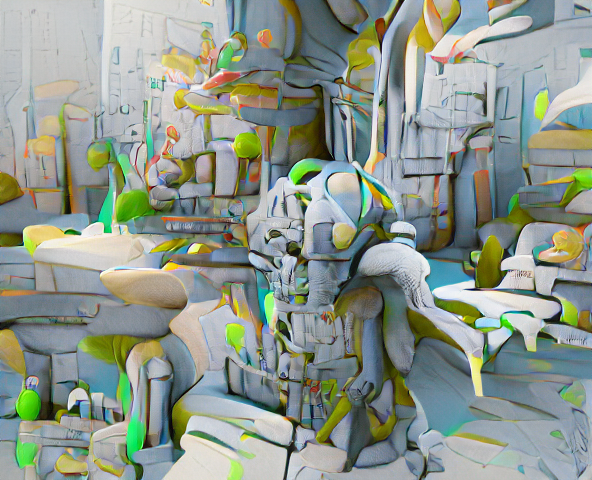

iter: 40, loss: 6.29, losses: 0.69, 0.712, 0.0758, 0.614, 0.637, 0.0889, 0.849, 0.86, 0.0448, 0.796, 0.868, 0.0489 (-0=>6.286)
iter: 50, loss: 6.21, losses: 0.682, 0.687, 0.0758, 0.607, 0.637, 0.0883, 0.841, 0.857, 0.0437, 0.784, 0.865, 0.0475 (-1=>6.168)


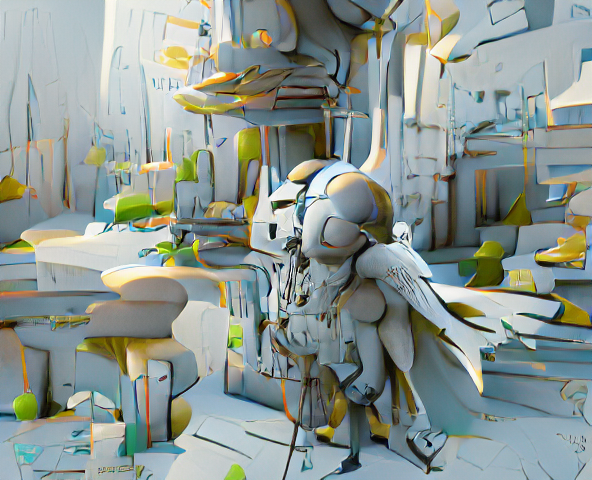

iter: 60, loss: 6.2, losses: 0.664, 0.708, 0.0764, 0.597, 0.641, 0.0893, 0.812, 0.864, 0.044, 0.785, 0.872, 0.0463 (-5=>6.096)
iter: 70, loss: 6.04, losses: 0.64, 0.674, 0.0757, 0.579, 0.63, 0.0909, 0.78, 0.846, 0.0468, 0.757, 0.868, 0.0484 (-5=>5.993)


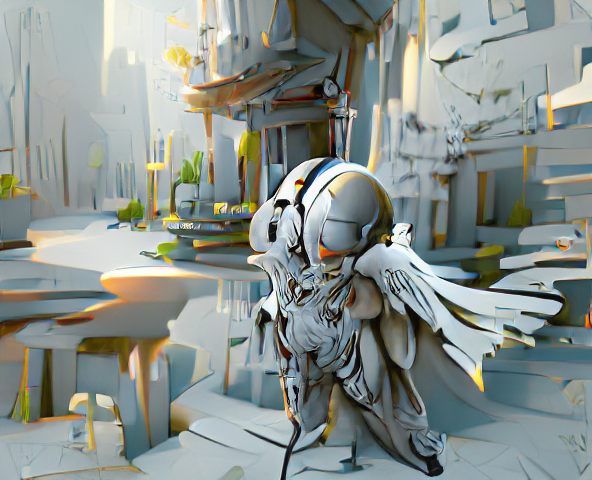

iter: 80, loss: 6.22, losses: 0.655, 0.662, 0.0791, 0.604, 0.648, 0.0906, 0.83, 0.88, 0.0457, 0.809, 0.875, 0.0463 (-4=>5.95)
iter: 90, loss: 5.83, losses: 0.635, 0.685, 0.0794, 0.533, 0.595, 0.0923, 0.744, 0.81, 0.0512, 0.706, 0.842, 0.0532 (-0=>5.826)


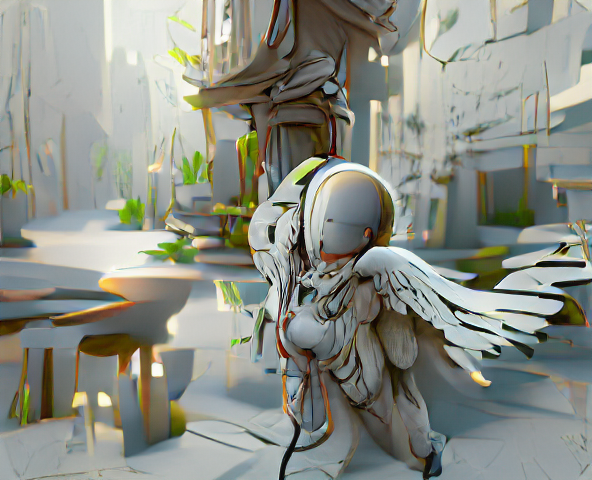

iter: 100, loss: 5.9, losses: 0.617, 0.672, 0.0793, 0.544, 0.6, 0.0932, 0.754, 0.852, 0.0519, 0.73, 0.851, 0.0531 (-6=>5.765)
iter: 110, loss: 6, losses: 0.615, 0.658, 0.0794, 0.567, 0.619, 0.0927, 0.792, 0.854, 0.0491, 0.756, 0.868, 0.0503 (-16=>5.765)


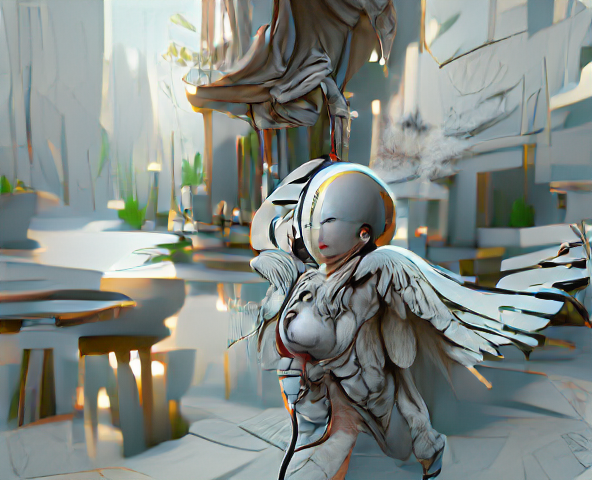

iter: 120, loss: 5.79, losses: 0.598, 0.635, 0.0783, 0.537, 0.597, 0.0925, 0.749, 0.826, 0.0501, 0.725, 0.847, 0.0523 (-26=>5.765)
iter: 130, loss: 5.89, losses: 0.612, 0.653, 0.0804, 0.564, 0.607, 0.0899, 0.774, 0.839, 0.0477, 0.733, 0.838, 0.0508 (-2=>5.747)


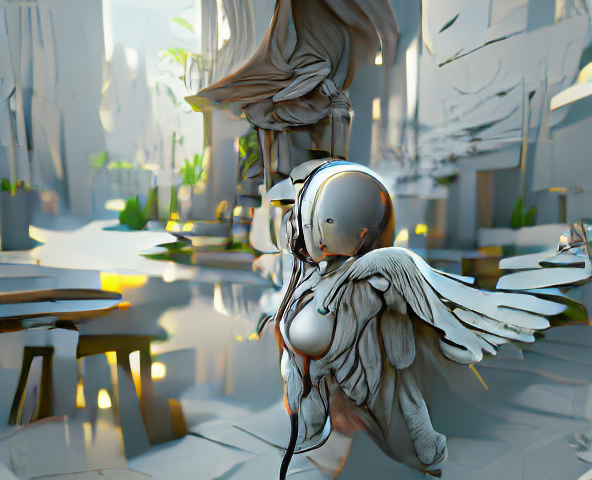

iter: 140, loss: 5.88, losses: 0.607, 0.654, 0.0799, 0.548, 0.606, 0.0923, 0.766, 0.844, 0.049, 0.733, 0.845, 0.0518 (-12=>5.747)
Dropping learning rate
iter: 150, loss: 5.7, losses: 0.615, 0.654, 0.0804, 0.515, 0.575, 0.0918, 0.73, 0.818, 0.0509, 0.689, 0.832, 0.0534 (-0=>5.703)


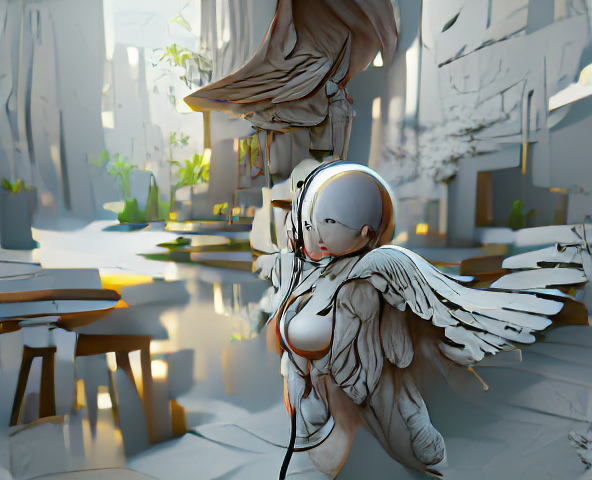

iter: 160, loss: 5.75, losses: 0.598, 0.648, 0.079, 0.537, 0.581, 0.0925, 0.754, 0.829, 0.0499, 0.7, 0.832, 0.0517 (-7=>5.648)
iter: 170, loss: 5.77, losses: 0.594, 0.629, 0.0785, 0.54, 0.599, 0.0916, 0.746, 0.84, 0.0496, 0.716, 0.839, 0.0511 (-8=>5.633)


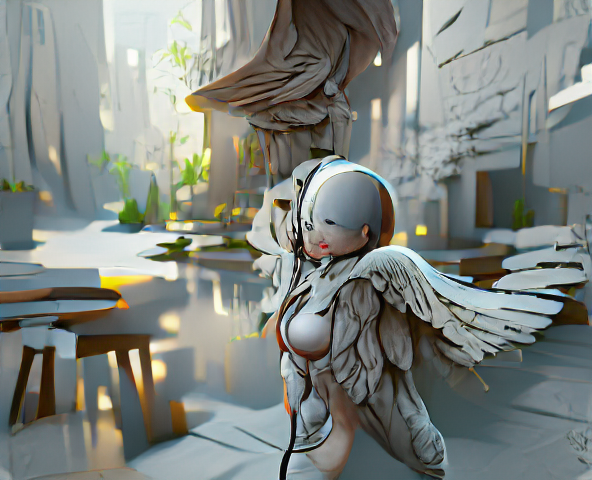

iter: 180, loss: 5.68, losses: 0.587, 0.633, 0.0795, 0.526, 0.578, 0.0913, 0.728, 0.827, 0.0529, 0.69, 0.835, 0.0541 (-18=>5.633)
iter: 190, loss: 5.76, losses: 0.612, 0.664, 0.0785, 0.522, 0.585, 0.0933, 0.736, 0.839, 0.0534, 0.694, 0.833, 0.0533 (-7=>5.628)


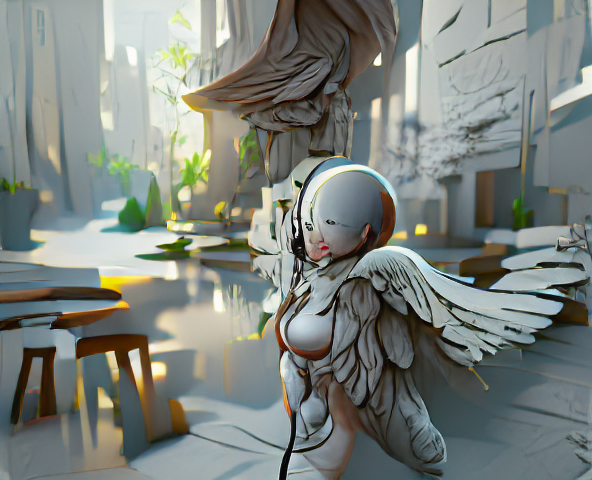

iter: 200, finished (-17=>5.628)



True

In [5]:
#@title Run pixray diffusion { vertical-output: true }

import sys
sys.path.append("pixray")
# Simple setup
import pixray

prompts = "the angel of air unreal engine | trending on artstation"
drawer = "vqgan"

# these are good settings for pixeldraw
pixray.reset_settings()
pixray.add_settings(prompts=prompts)
pixray.add_settings(quality="supreme")
pixray.add_settings(size=[600,490])
pixray.add_settings(iterations=200)
pixray.add_settings(drawer=drawer)
#pixray.add_settings(learning_rate=0.01)
# pixray.add_settings(save_every=100)
# pixray.add_settings(display_every=100)
# pixray.add_settings(learning_rate_drops=[1,2,3,4,5,6,7,8,9,10])
pixray.add_settings(display_clear=False)
settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)

In [ ]:
= #@title run og diffusion { vertical-output: true }
!cd v-diffusion-pytorch && python clip_sample.py "a sunset at sea" --model yfcc_2 --seed 42
display.clear_output()
from IPython.display import Image
display(Image("v-diffusion-pytorch/out_00000.png"))